# Projet : Partie 3
## Extraction de motifs fréquents, règles d'associations et corrélations

### Importer les librairies et le dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
from collections import Counter
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_excel("Dataset2_ TrendingVideosYoutube_.xlsx")
df.head()

,Watcher,videoCategoryId,videoCategoryLabel,definition
0,Billy,29.0,Nonprofits & Activism,hd
1,Leila,22.0,People & Blogs,sd
2,Billy,22.0,People & Blogs,sd
3,Mark,24.0,Entertainment,hd
4,Billy,24.0,Entertainment,hd


### Jeu de données

#### Analyse du dataset

In [3]:
dataset_description = {}
dataset_description["Nombre de lignes"] = df.shape[0]
dataset_description["Nombre de colonnes"] = df.shape[1]
dataset_description["Usage en memoire"] = str(df.memory_usage(index=False).sum() / 1024) + " ko"
dataset_description["Type de donnees"] = list(map(str, df.dtypes.unique().tolist()))
pd.DataFrame.from_dict(dataset_description, orient='index', columns = [""])

,
Nombre de lignes,115
Nombre de colonnes,4
Usage en memoire,3.59375 ko
Type de donnees,"[object, float64]"


In [4]:
colonnes_description = []
for d in df:
    colonnes_description.append([d, df[d].count(), str(df.dtypes[d]), len(df[d].unique())])
pd.DataFrame(colonnes_description, columns = ["Nom","Valeur non null","Type", "Nombre de valeur unique"])

,Nom,Valeur non null,Type,Nombre de valeur unique
0,Watcher,115,object,39
1,videoCategoryId,115,float64,13
2,videoCategoryLabel,115,object,13
3,definition,112,object,3


In [5]:
d = df["definition"].fillna("no def")
df["definition"] = d
print(df["definition"].unique())

['hd' 'sd' 'no def']


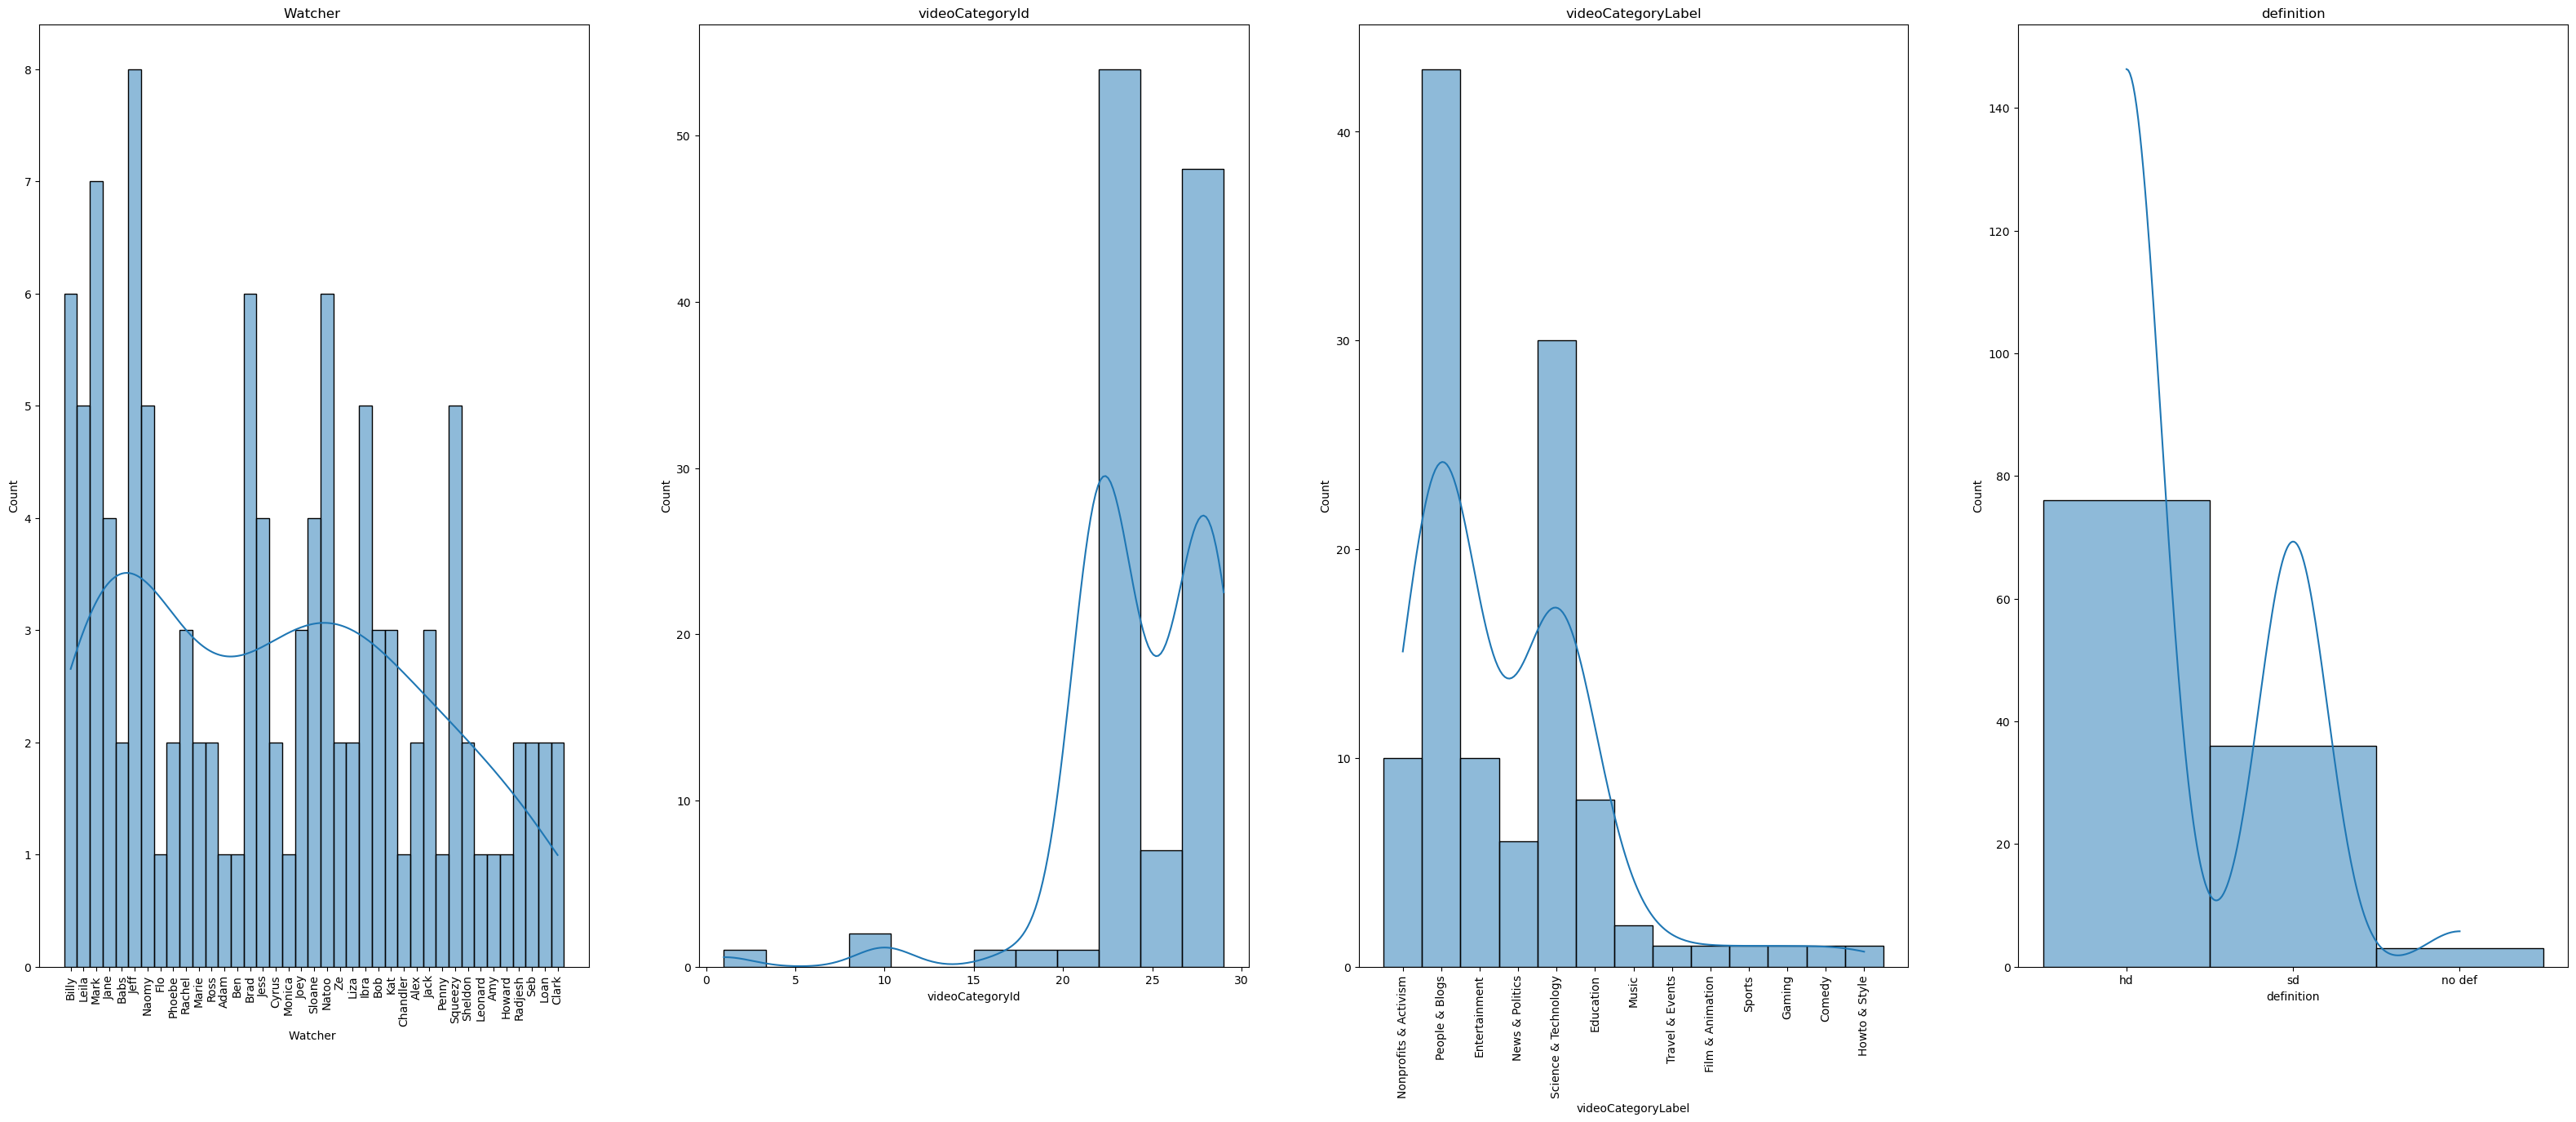

In [6]:
fig, axes = plt.subplots(1, 4,figsize=(40, 15))
i = 0
dd = []
title = []
for d in df:
    # if d != "Watcher ":
    dd.append(df[d])
    title.append(d)
for d, t, ax in zip(dd, title, axes.ravel()):
    h = sns.histplot(data = d, kde=True, ax=ax).set(title=t)
ticks = axes[0].set_xticklabels(df["Watcher "].unique(),rotation=90)
ticks = axes[2].set_xticklabels(df["videoCategoryLabel"].unique(),rotation=90)


#### Prétraitement des données

In [7]:
pd.DataFrame(list(df["videoCategoryLabel"].unique()), columns = ["videoCategoryLabel Unique"])

,videoCategoryLabel Unique
0,Nonprofits & Activism
1,People & Blogs
2,Entertainment
3,News & Politics
4,Science & Technology
5,Education
6,Music
7,Travel & Events
8,Film & Animation
9,Sports


In [8]:
for d in df["videoCategoryLabel"].unique():
    dd = d.replace(" ", "_")
    df["videoCategoryLabel"] = df["videoCategoryLabel"].replace(d, dd)
pd.DataFrame(list(df["videoCategoryLabel"].unique()), columns = ["videoCategoryLabel Unique"])

,videoCategoryLabel Unique
0,Nonprofits_&_Activism
1,People_&_Blogs
2,Entertainment
3,News_&_Politics
4,Science_&_Technology
5,Education
6,Music
7,Travel_&_Events
8,Film_&_Animation
9,Sports


In [12]:
def create_data_table(df):
    for d in df["videoCategoryLabel"].unique():
        dd = d.replace(" ", "_")
        df["videoCategoryLabel"] = df["videoCategoryLabel"].replace(d, dd)

    data = dict()
    for d in df["Watcher "].unique():
        t = df.loc[df["Watcher "] == d]
        data[d] = list(set(t["videoCategoryLabel"]))

    table_data = []
    for d in data.items():
        table_data.append([d[0],d[1]])
    return table_data, data
table_data, data = create_data_table(df)
pd.DataFrame(table_data, columns = ["Watcher","Categories"])

,Watcher,Categories
0,Billy,"[Entertainment, People_&_Blogs, Science_&_Technology, Howto_&_Style, Nonprofits_&_Activism]"
1,Leila,"[People_&_Blogs, Science_&_Technology, Comedy, Film_&_Animation, Nonprofits_&_Activism]"
2,Mark,"[Entertainment, People_&_Blogs, Science_&_Technology, Nonprofits_&_Activism, Education]"
3,Jane,"[Entertainment, People_&_Blogs, Education]"
4,Babs,[People_&_Blogs]
5,Jeff,"[Entertainment, Science_&_Technology, News_&_Politics, Gaming, Education]"
6,Naomy,"[Music, Nonprofits_&_Activism, People_&_Blogs, Science_&_Technology]"
7,Flo,[Science_&_Technology]
8,Phoebe,"[People_&_Blogs, Science_&_Technology]"
9,Rachel,"[People_&_Blogs, Science_&_Technology]"


### Application de l'algorithme Apriori

In [13]:
# fonction qui retourne une liste d'item dans le meme format que dans lequel ils se trouvent dans le dictionaire de base
def item_format(item):
    item_list = list(item.split("'"))
    special_characters = "[', ']"
    item_list_format = [i for i in item_list if  i not in special_characters]
    return item_list_format

# fonction qui crée les tables C1, C2, C3,...,Ck
def create_ck_table(data, lk, k):
    c = Counter()
    if k == 1:
        item_set = list(set(sum(data.values(), [])))
    else:
        item_set = set()
        temp = list(lk)
        for i in range(0,len(temp)):
            for j in range(i+1,len(temp)):
                t = {z for z in item_format(temp[i])}.union({w for w in item_format(temp[j])})
                if(len(t) == k):
                    t = sorted(t)
                    item_set.add(str(t))
        item_set = list(item_set)
    for i in item_set:
        c[i] = 0
        for d in data.values():
            if all(item in d for item in item_format(i)):
                c[i] += 1
    return c

# fonction qui affiche la table Ck
def display_ck_table(ck, k):
    print("C"+str(k)+":")
    for i in ck:
        i_set = set()
        for it in item_format(i):
            i_set.add(it)
        print(str(i_set)+": "+str(ck[i]))
    print()

# fonction qui crée les tables L1, L2, L3,...,Lk
def create_lk_table(data, ck, k, s):
    l = Counter()
    for i in ck:
        if(ck[i] >= s):
            l[str(i)] += ck[i]
    return l

# fonction qui affiche la table Lk
def display_lk_table(lk, k):
    final = []
    print("L"+str(k)+":")
    for i in lk:
        i_set = set()
        for it in item_format(i):
            i_set.add(it)
        print(str(i_set)+": "+str(lk[i]))
        final.append(i_set)
    print()
    return final

In [14]:
def apriori(data,s):
    s = len(data) * s
    final = []
    ck = Counter()
    lk = Counter()
    for k in range(1,1000):
        ck = create_ck_table(data,lk,k)
        if len(ck) == 0:
            break
        display_ck_table(ck,k)
        lk = create_lk_table(data,ck,k,s)
        if len(lk) == 0:
            break
        l_items = display_lk_table(lk,k)
        for li in l_items:
            final.append(li)
    return final
final_items = apriori(data,0.2)
print("L = L1 U L2 U L3 :")
print(final_items)

C1:
{'Entertainment'}: 7
{'People_&_Blogs'}: 31
{'Travel_&_Events'}: 1
{'Science_&_Technology'}: 24
{'Comedy'}: 1
{'News_&_Politics'}: 5
{'Howto_&_Style'}: 1
{'Sports'}: 1
{'Gaming'}: 1
{'Music'}: 2
{'Film_&_Animation'}: 1
{'Nonprofits_&_Activism'}: 9
{'Education'}: 8

L1:
{'People_&_Blogs'}: 31
{'Science_&_Technology'}: 24
{'Nonprofits_&_Activism'}: 9
{'Education'}: 8

C2:
{'Nonprofits_&_Activism', 'People_&_Blogs'}: 8
{'Education', 'Science_&_Technology'}: 5
{'Nonprofits_&_Activism', 'Education'}: 3
{'People_&_Blogs', 'Education'}: 6
{'People_&_Blogs', 'Science_&_Technology'}: 17
{'Nonprofits_&_Activism', 'Science_&_Technology'}: 9

L2:
{'Nonprofits_&_Activism', 'People_&_Blogs'}: 8
{'People_&_Blogs', 'Science_&_Technology'}: 17
{'Nonprofits_&_Activism', 'Science_&_Technology'}: 9

C3:
{'Nonprofits_&_Activism', 'People_&_Blogs', 'Science_&_Technology'}: 8

L3:
{'Nonprofits_&_Activism', 'People_&_Blogs', 'Science_&_Technology'}: 8

L = L1 U L2 U L3 :
[{'People_&_Blogs'}, {'Science_&_T

In [15]:
def pair_up(items):
    pairs = []
    for i in range(len(items)):
        for j in range(len(items)):
            pairs.append((items[i],items[j]))
    return pairs

def make_rules(items):
    rules = pair_up(items)
    final_rules = list()
    for r in rules :
        X = list(r[0])
        Y = list(r[1])
        for x in X:
            if x in Y:
                Y.remove(x)
        if (X,Y) not in final_rules and len(Y) != 0:
            final_rules.append((X,Y))
    return final_rules

final_rules = make_rules(final_items)

table_rule = []
for fr in final_rules:
    table_rule.append(str(set(fr[0]))+" ---> "+str(set(fr[1])))
pd.DataFrame(table_rule, columns = ["Rule"])

,Rule
0,{'People_&_Blogs'} ---> {'Science_&_Technology'}
1,{'People_&_Blogs'} ---> {'Nonprofits_&_Activism'}
2,{'People_&_Blogs'} ---> {'Education'}
3,"{'People_&_Blogs'} ---> {'Nonprofits_&_Activism', 'Science_&_Technology'}"
4,{'Science_&_Technology'} ---> {'People_&_Blogs'}
5,{'Science_&_Technology'} ---> {'Nonprofits_&_Activism'}
6,{'Science_&_Technology'} ---> {'Education'}
7,"{'Science_&_Technology'} ---> {'Nonprofits_&_Activism', 'People_&_Blogs'}"
8,{'Nonprofits_&_Activism'} ---> {'People_&_Blogs'}
9,{'Nonprofits_&_Activism'} ---> {'Science_&_Technology'}


In [16]:
def association_correlation_rules(items, min_conf):
    table = []
    rules = make_rules(items)
    min_c = min_conf * len(data.values())
    for fr in rules:
        x, y = fr
        xy = sum(fr,[])
        count_x, count_y, count_xy = 0, 0, 0
        str_x, str_y = str(set(x)).replace("_", " "), str(set(y)).replace("_", " ")
        rule = str_x +" ---> "+ str_y
        for d in data.values():
            if x[0] in d:
                count_x += 1
            if y[0] in d:
                count_y += 1
            check =  all(item in d for item in xy)
            if check:
                count_xy += 1
        support_x = count_x / len(data.values())
        support_y = count_y / len(data.values())
        support_xy = count_xy / len(data.values())
        conf = support_xy / support_x 
        lift = support_xy / (support_x * support_y)
        if (conf * len(data.values()) >= min_c):
            table.append([rule, str(int(conf*100))+"%", "{:.2f}".format(round(support_xy, 2))])
    return table
table = association_correlation_rules(final_items, 0.15)
pd.DataFrame(table, columns = ["Rule","Confidence","Lift"])



,Rule,Confidence,Lift
0,{'People & Blogs'} ---> {'Science & Technology'},54%,0.44
1,{'People & Blogs'} ---> {'Nonprofits & Activism'},25%,0.21
2,{'People & Blogs'} ---> {'Education'},19%,0.15
3,"{'People & Blogs'} ---> {'Nonprofits & Activism', 'Science & Technology'}",25%,0.21
4,{'Science & Technology'} ---> {'People & Blogs'},70%,0.44
5,{'Science & Technology'} ---> {'Nonprofits & Activism'},37%,0.23
6,{'Science & Technology'} ---> {'Education'},20%,0.13
7,"{'Science & Technology'} ---> {'Nonprofits & Activism', 'People & Blogs'}",33%,0.21
8,{'Nonprofits & Activism'} ---> {'People & Blogs'},88%,0.21
9,{'Nonprofits & Activism'} ---> {'Science & Technology'},100%,0.23
